In [1]:
''' magic 4u'''
%load_ext autoreload
%autoreload 2

In [2]:
'''Get Stuff You Need'''
import numpy as np
import math as math
from tqdm import tnrange
from tqdm.notebook import tqdm as tdqm
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from matplotlib import gridspec
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d
from scipy import stats
import scipy.io
import scipy.ndimage.filters as filt
import pandas as pd
import seaborn as sns

from pipeline import get_data as get
from pipeline import process_spikes as ps

from statsmodels.tsa.stattools import acf
from scipy.signal import find_peaks
from itertools import combinations

In [3]:
''' Define plotting defaults '''

from matplotlib import rc 
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['svg.fonttype'] = 'none'

save_folder = 'C:/Users/Python/Desktop/LocalData/Figure7/' 

In [4]:
coherence = [0.771507,0.743562,0.751875,0.722717,0.76769,0.783099,0.771744,0.598272,0.647575,0.688719,0.614267,0.674573,0.752533,0.741628]
adamts3 = [2434.00769,1278.451717,1996.709615,2555.452779,1832.066644,2567.381172,2951.50437,745.0741398,1460.752713,1463.475755,1138.184964,957.0021128,2874.030388,1701.103465]
hapln4 = [535.8996691, 708.0133348, 562.140088, 541.6174085, 579.4763986, 813.0257486, 945.0704155, 2274.470467, 1131.280868, 1239.024935, 1374.522669, 1179.153181, 1204.534184, 846.2194377]


Association btwn Young, Aged, & All Decoder Score vs. Coherence:
R [Young, Aged, All]: 
0.29936994352991936 0.8098837993395726 0.7727664743552435
P [Young, MA, Aged, All]: 
0.5142384986695967 0.02724413227163915 0.0011937429294855187


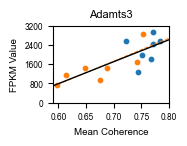


Association btwn Young, Aged, & All Decoder Score vs. Coherence:
R [Young, Aged, All]: 
0.47119318654988435 -0.7080378134897743 -0.7971449300581164
P [Young, MA, Aged, All]: 
0.2858370824862966 0.07502910637629706 0.0006396510354129063


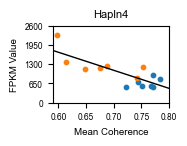

In [5]:
''' Plot 7G'''

#ADAMTS3
res = stats.linregress(coherence[:7],adamts3[:7])
yslope2 = res.slope; yint2 = res.intercept; yr2 = res.rvalue; yp2 = res.pvalue

res = stats.linregress(coherence[7:],adamts3[7:])
aslope2 = res.slope; aint2 = res.intercept; ar2 = res.rvalue ; ap2 = res.pvalue

res = stats.linregress(coherence,adamts3)
allslope2 = res.slope; allint2 = res.intercept; allr2 = res.rvalue; allp2 = res.pvalue

print('\nAssociation btwn Young, Aged, & All Decoder Score vs. Coherence:')
print('R [Young, Aged, All]: ')
print(yr2, ar2, allr2)
print('P [Young, MA, Aged, All]: ')
print(yp2, ap2, allp2)

#Plot Figure 7Gtop
fig, ax = plt.subplots(figsize = (1.5,1))
ax.set_title('Adamts3', fontsize = 8)
ax.scatter(coherence[:7],adamts3[:7], color = 'C0', label = 'Young', s = 10)
ax.scatter(coherence[7:],adamts3[7:], color = 'C1', label = 'Aged', s = 10)
ax.set_xlabel('Mean Coherence', fontsize = 7)
ax.set_ylabel('FPKM Value', fontsize = 7)
ax.set_xlim([0.59,0.8])
ax.set_ylim([0,3200])
ax.set_yticks([0,800,1600,2400,3200])
ax.set_xticks([0.6,0.65,0.7,0.75,0.8])
ax.tick_params(labelsize = 6)
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
#ax.plot(X_plot, yslope2*X_plot + yint2, '--', linewidth = 0.75, color = 'C0', label = 'Young Fit')
ax.plot(X_plot, aslope2*X_plot + aint2, '--', linewidth = 0.75, color = 'C1', label = 'Aged')
ax.plot(X_plot, allslope2*X_plot + allint2, '-', linewidth = 1, color = 'k', label = 'All Ages')
#ax.legend(loc = 4, fontsize = 9, prop = {'size': 10})
plt.savefig(save_folder + '7Gtop.png', dpi = 400, bbox_inches = 'tight')
plt.savefig(save_folder + '7Gtop.svg', dpi = 400, bbox_inches = 'tight')
plt.show()

#ADAMTS3
res = stats.linregress(coherence[:7],hapln4[:7])
yslope2 = res.slope; yint2 = res.intercept; yr2 = res.rvalue; yp2 = res.pvalue

res = stats.linregress(coherence[7:],hapln4[7:])
aslope2 = res.slope; aint2 = res.intercept; ar2 = res.rvalue ; ap2 = res.pvalue

res = stats.linregress(coherence,hapln4)
allslope2 = res.slope; allint2 = res.intercept; allr2 = res.rvalue; allp2 = res.pvalue

print('\nAssociation btwn Young, Aged, & All Decoder Score vs. Coherence:')
print('R [Young, Aged, All]: ')
print(yr2, ar2, allr2)
print('P [Young, MA, Aged, All]: ')
print(yp2, ap2, allp2)

#Plot Figure 7Gtop
fig, ax = plt.subplots(figsize = (1.5,1))
ax.set_title('Hapln4', fontsize = 8)
ax.scatter(coherence[:7],hapln4[:7], color = 'C0', label = 'Young', s = 10)
ax.scatter(coherence[7:],hapln4[7:], color = 'C1', label = 'Aged', s = 10)
ax.set_xlabel('Mean Coherence', fontsize = 7)
ax.set_ylabel('FPKM Value', fontsize = 7)
ax.set_xlim([0.59,0.8])
ax.set_ylim([0,2600])
ax.set_yticks([0,650,1300,1950,2600])
ax.set_xticks([0.6,0.65,0.7,0.75,0.8])
ax.tick_params(labelsize = 6)
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
#ax.plot(X_plot, yslope2*X_plot + yint2, '--', linewidth = 0.75, color = 'C0', label = 'Young Fit')
#ax.plot(X_plot, aslope2*X_plot + aint2, '--', linewidth = 0.75, color = 'C1', label = 'Aged')
ax.plot(X_plot, allslope2*X_plot + allint2, '-', linewidth = 1, color = 'k', label = 'All Ages')
#ax.legend(loc = 4, fontsize = 9, prop = {'size': 10})
plt.savefig(save_folder + '7Gbottom.png', dpi = 400, bbox_inches = 'tight')
plt.savefig(save_folder + '7Gbottom.svg', dpi = 400, bbox_inches = 'tight')
plt.show()


In [6]:
figure7f = pd.read_csv('C:/Users/Python/Downloads/7F.csv') # adjust path name
figure7f.head()

,Gene,DEG,r,T,p,sig,Critical value,sigFDR,rank,pmk,padj
0,Pole3,0,-0.926975,8.560219,0.000002,1,0.000005,1,1,0.038774,0.025079
1,Txnl4b,0,-0.921778,8.235701,0.000003,1,0.000010,1,2,0.028951,0.025079
2,Asf1a,0,-0.918180,8.028658,0.000004,1,0.000014,1,3,0.025079,0.025079
3,Rrs1,0,-0.909696,7.588417,0.000006,1,0.000019,1,4,0.033364,0.033364
4,Mrpl47,0,-0.899990,7.152069,0.000012,1,0.000024,1,5,0.048194,0.048194


In [7]:
#Gather data from spreadsheet

sigcorrR = np.array(figure7f.loc[(figure7f.sigFDR == 1),'r'])
nscorrR = np.array(figure7f.loc[(figure7f.sigFDR == 0),'r'])

sigcorrp = np.array(figure7f.loc[(figure7f.sigFDR == 1),'pmk'])
nscorrp = np.array(figure7f.loc[(figure7f.sigFDR == 0),'pmk'])

hapln4p = np.array(figure7f.loc[(figure7f.Gene == 'Hapln4'),'pmk'])
hapln4r = np.array(figure7f.loc[(figure7f.Gene == 'Hapln4'),'r'])
adamts3p = np.array(figure7f.loc[(figure7f.Gene == 'Adamts3'),'pmk'])
adamts3r = np.array(figure7f.loc[(figure7f.Gene == 'Adamts3'),'r'])

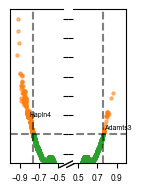

In [8]:
''' Plot Figure 7F'''

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (1.5,2),sharey = True)
fig.subplots_adjust(wspace = 0.2)
ax1.scatter(sigcorrR,-1*np.log10(sigcorrp), color = 'C1', alpha = 0.5, s = 5)
ax1.scatter(nscorrR,-1*np.log10(nscorrp), color = 'C2', alpha = 0.5, s = 5)
ax1.set_xlim([-1,-0.45])
ax1.set_xticks([-0.9,-0.7,-0.5])
ax1.set_ylim([0.85,1.65])
ax2.scatter(sigcorrR,-1*np.log10(sigcorrp), color = 'C1', alpha = 0.5, s = 5)
ax2.scatter(nscorrR,-1*np.log10(nscorrp), color = 'C2', alpha = 0.5, s = 5)
ax2.set_xlim([0.45,1])
ax2.set_xticks([0.5,0.7,0.9])
ax2.set_ylim([0.85,1.65])
ax1.spines.right.set_visible(False)
ax2.spines.left.set_visible(False)
ax1.yaxis.tick_right()
ax1.tick_params(labelright=False, labelsize = 6)
ax2.tick_params(labelsize = 6)
ax2.yaxis.tick_left()

ax1.hlines(np.max(-1*np.log10(nscorrp)),-1,1,'k','--',alpha = 0.5)
ax2.hlines(np.max(-1*np.log10(nscorrp)),-1,1,'k','--',alpha = 0.5)
ax1.vlines(np.min(nscorrR),0.85,1.65,'k','--',alpha = 0.5)
ax2.vlines(np.max(nscorrR),0.85,1.65,'k','--',alpha = 0.5)

ax1.annotate('Hapln4',(hapln4r,-1*np.log10(hapln4p)),fontsize = 5)
ax2.annotate('Adamts3',(adamts3r,-1*np.log10(adamts3p)),fontsize =5)

#add slant broken line
d = 0.5
kwargs = dict(marker=[(-1,-d),(1,d)], markersize = 12, linestyle = "none",color = 'k', mec = 'k', mew = 1, clip_on=False)
ax1.plot([1.08,1.22],[0,0], transform=ax1.transAxes,**kwargs)
#ax2.plot([0,1],[1,1], transform=ax2.transAxes,**kwargs)

plt.savefig(save_folder + '7F.png', dpi = 400, bbox_inches = 'tight')
plt.savefig(save_folder + '7F.svg', dpi = 400, bbox_inches = 'tight')
plt.show()


In [9]:
print(adamts3r,-1*np.log10(adamts3p))
print(hapln4r,-1*np.log10(hapln4p))

[0.77276647] [1.0242259]
[-0.79714493] [1.09173615]


In [110]:
#assemble imaging data

youngPNN = [3.01105E-05 , 2.15797E-05, 3.98246E-06, 2.2727E-05, 2.73576E-06,5.53944E-05]
agedPNN = [0.0000447565, 0.0000384606, 0.0000377460, 0.0000607957, 0.0000262604, 0.0000392334, 0.0000363791]

youngEXPNN = [0.0000081782, 0.0000041645, 0.0000039825, 0.0000030816, 0.0000023449, 0.0000201861]
agedEXPNN = [0.0000172499, 0.0000192303, 0.0000130014, 0.0000263920, 0.0000100767, 0.0000127872, 0.0000063268]

youngPVPNN = [0.0000219323,0.0000174152, 0.0000000000, 0.0000196454,0.0000003908,0.0000352083]
agedPVPNN = [0.0000275066, 0.0000192303, 0.0000247446, 0.0000344038, 0.0000161837, 0.0000264462,0.0000300523]

youngPV = [0.000140887, 0.000111684, 0.000106199, 0.000102079, 0.000128581, 0.000115483]
agedPV = [0.000158513, 0.000107332, 0.000163146, 0.000138086, 0.000090079, 0.000146471, 0.000146044]

youngPVwPNN = [0.0000219323, 0.0000174152, 0.0000000000, 0.0000196454, 0.0000003908, 0.0000352083]
agedPVwPNN = [0.0000275066, 0.0000192303, 0.0000247446, 0.0000344038, 0.0000161837, 0.0000174152, 0.0000264462]

youngperPVwPNNs = [15.5672823219, 15.5932203390, 0.0000000000, 19.2452830189, 0.3039513678,30.4878048780]
agedperPVwPNNs = [17.3529411765, 17.9166666667, 15.1670951157, 24.9146757679, 17.9661016949, 18.0555555556, 20.5776173285]

youngPNNarea = [187.3336914, 169.3784211, 167.0988889, 201.1980508, 141.8831429, 224.334822]
agedPNNarea = [148.9779322, 170.7934884, 152.9807889, 203.5792171, 145.4469302, 181.5834296, 194.9815145]

youngPNNintensity = [171.4255802, 81.43789474, 156.4695556, 149.2542712, 165.0221429, 195.272339]
agedPNNintensity = [125.102339, 93.59272093, 198.8249111, 190.9663643, 166.3725233, 171.7484741, 157.0081014]

youngpernonPVPNN = [27.16049383, 19.29824561, 100, 13.55932203, 85.71428571, 36.44067797]
agedpernonPVPNN = [38.54166667, 50, 34.44444444, 43.41085271, 38.37209302, 32.59259259, 17.39130435]

stability = [0.11288,0.129523,0.070809,0.164817,0.171753,0.150359,0.034743,0.110164,0.130807,0.076806,0.093775,0.123128,0.139645]
hapln4 = [535.8996691, 708.0133348, 541.6174085, 579.4763986, 813.0257486, 945.0704155, 2274.470467, 1131.280868, 1239.024935, 1374.522669, 1179.153181, 1204.534184, 846.2194377]
coherence = [0.771507,0.743562,0.722717,0.76769,0.783099,0.771744,0.598272,0.647575,0.688719,0.614267,0.674573,0.752533,0.741628]

In [111]:
''' Check if PNN Density is Age-Modulated '''

print(np.mean(youngPNN), stats.sem(youngPNN))
print(np.mean(agedPNN), stats.sem(agedPNN))

F, p = stats.ranksums(youngPNN, agedPNN)
print(F, p)

r, p = stats.pearsonr(np.concatenate((youngPNN, agedPNN)), hapln4)
print(r, p)

r, p = stats.pearsonr(np.concatenate((youngPNN, agedPNN)), coherence)
print(r, p)

2.2754970000000003e-05 7.90357335834832e-06
4.051881428571428e-05 3.973503677003012e-06
-2.0 0.04550026389635839
0.5537231150832669 0.04961028569447767
-0.4715554579382478 0.10378975857104723


In [112]:
''' Check if non-PV PNN Density is Age-Modulated '''

print(np.mean(youngEXPNN), stats.sem(youngEXPNN))
print(np.mean(agedEXPNN), stats.sem(agedEXPNN))

F, p = stats.ranksums(youngEXPNN, agedEXPNN)
print(F, p)

r, p = stats.pearsonr(np.concatenate((youngEXPNN, agedEXPNN)), hapln4)
print(r, p)

r, p = stats.pearsonr(np.concatenate((youngEXPNN, agedEXPNN)), stability)
print(r, p)

r, p = stats.pearsonr(np.concatenate((youngEXPNN, agedEXPNN)), coherence)
print(r, p)

6.989633333333334e-06 2.7654410420602192e-06
1.5009185714285713e-05 2.4932706020338e-06
-2.0 0.04550026389635839
0.6288523108308532 0.02131490908424954
-0.4259980120523903 0.1466587127445006
-0.6596113730699306 0.014171897091067556


In [113]:
''' Check if PV PNN Density is Age-Modulated '''

print(np.mean(youngPVPNN), stats.sem(youngPVPNN))
print(np.mean(agedPVPNN), stats.sem(agedPVPNN))

F, p = stats.ranksums(youngPVPNN, agedPVPNN)
print(F, p)

r, p = stats.pearsonr(np.concatenate((youngPVPNN, agedPVPNN)), hapln4)
print(r, p)

r, p = stats.pearsonr(np.concatenate((youngPVPNN, agedPVPNN)), stability)
print(r, p)

r, p = stats.pearsonr(np.concatenate((youngPVPNN, agedPVPNN)), coherence)
print(r, p)

1.5765333333333333e-05 5.534014270410866e-06
2.5509642857142857e-05 2.348228257021627e-06
-1.2857142857142858 0.19854279368666194
0.42975971428979914 0.142741540500669
-0.08839450922370669 0.7739904850353764
-0.28009532392652253 0.3539865049796788


In [13]:
''' Check in PV IN Density is Altered'''

print(np.mean(youngPV), stats.sem(youngPV))
print(np.mean(agedPV), stats.sem(agedPV))

F, p = stats.ranksums(youngPV, agedPV)
print(F, p)

r, p = stats.pearsonr(np.concatenate((youngPV, agedPV)), hapln4)
print(r, p)

r, p = stats.pearsonr(np.concatenate((youngPV, agedPV)), coherence)
print(r, p)

0.00011748549999999999 5.980950469337351e-06
0.00013566728571428571 1.0221864091749805e-05
-1.4285714285714286 0.1531274510196695
0.47947178506232424 0.09732777989710886
-0.1906779308272904 0.5326316135962957


In [14]:
''' Check in PV IN with PNN Density is Altered'''

print(np.mean(youngPVwPNN), stats.sem(youngPVwPNN))
print(np.mean(agedPVwPNN), stats.sem(agedPVwPNN))

F, p = stats.ranksums(youngPVwPNN, agedPVwPNN)
print(F, p)

r, p = stats.pearsonr(np.concatenate((youngPVwPNN, agedPVwPNN)), hapln4)
print(r, p)

r, p = stats.pearsonr(np.concatenate((youngPVwPNN, agedPVwPNN)), coherence)
print(r, p)

1.5765333333333333e-05 5.534014270410866e-06
2.370434285714286e-05 2.457572865737283e-06
-0.9285714285714286 0.35311123450600557
0.4268297744373025 0.14578658978892145
-0.344123649940659 0.24959310746470897


In [17]:
''' Check PNN Area is Altered'''

print(np.mean(youngPNNarea), stats.sem(youngPNNarea))
print(np.mean(agedPNNarea), stats.sem(agedPNNarea))

F, p = stats.ranksums(youngPNNarea, agedPNNarea)
print(F, p)

r, p = stats.pearsonr(np.concatenate((youngPNNarea, agedPNNarea)), hapln4)
print(r, p)

r, p = stats.pearsonr(np.concatenate((youngPNNarea, agedPNNarea)), coherence)
print(r, p)

181.87116951666667 11.803757280355232
171.19190012857143 8.743616840633685
0.42857142857142855 0.6682351417952492
-0.3047421908249516 0.31134702266344405
0.2821855885350504 0.35025345292032867


In [18]:
''' Check PNN Intensity is Altered'''

print(np.mean(youngPNNintensity), stats.sem(youngPNNintensity))
print(np.mean(agedPNNintensity), stats.sem(agedPNNintensity))

F, p = stats.ranksums(youngPNNintensity, agedPNNintensity)
print(F, p)

r, p = stats.pearsonr(np.concatenate((youngPNNintensity, agedPNNintensity)), hapln4)
print(r, p)

r, p = stats.pearsonr(np.concatenate((youngPNNintensity, agedPNNintensity)), coherence)
print(r, p)

153.14696394 15.724776828618342
157.65934773285716 14.00960510600914
-0.5714285714285714 0.5677091661973526
-0.028244777288392475 0.9270209645757528
0.16808009965095 0.5830817603646117


In [19]:
''' Check % non PV PNN is Altered'''

print(np.mean(youngpernonPVPNN), stats.sem(youngpernonPVPNN))
print(np.mean(agedpernonPVPNN), stats.sem(agedpernonPVPNN))

F, p = stats.ranksums(youngpernonPVPNN, agedpernonPVPNN)
print(F, p)

r, p = stats.pearsonr(np.concatenate((youngpernonPVPNN, agedpernonPVPNN)), hapln4)
print(r, p)

r, p = stats.pearsonr(np.concatenate((youngpernonPVPNN, agedpernonPVPNN)), coherence)
print(r, p)

47.028837525 14.942737761867535
36.39327911142857 3.8490527145746625
-0.2857142857142857 0.7750969621959847
-0.08506390374452973 0.7823185689843456
-0.04343256974903383 0.8879616023558909



Association btwn Young, Aged, & All Decoder Score vs. hapln4:
R [Young, Aged, All]: 
0.6101230636175762 0.4038979640962013 0.628852310830853
P [Young, MA, Aged, All]: 
0.19837460639007598 0.3688535980580756 0.021314909084249576


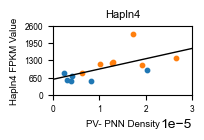


Association btwn Young, Aged, & All Decoder Score vs. Coherence:
R [Young, Aged, All]: 
0.2495454497473149 -0.7503251888671619 -0.6596113730699306
P [Young, MA, Aged, All]: 
0.6334517887268545 0.052021780085838354 0.0141718970910675


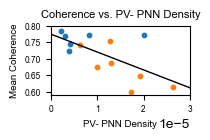

In [124]:
'''Plot 7S'''

#Hapln4 EXPNN
res = stats.linregress(youngEXPNN,hapln4[:6])
yslope2 = res.slope; yint2 = res.intercept; yr2 = res.rvalue; yp2 = res.pvalue

res = stats.linregress(agedEXPNN,hapln4[6:])
aslope2 = res.slope; aint2 = res.intercept; ar2 = res.rvalue ; ap2 = res.pvalue

res = stats.linregress(np.concatenate((youngEXPNN, agedEXPNN)),hapln4)
allslope2 = res.slope; allint2 = res.intercept; allr2 = res.rvalue; allp2 = res.pvalue

print('\nAssociation btwn Young, Aged, & All Decoder Score vs. hapln4:')
print('R [Young, Aged, All]: ')
print(yr2, ar2, allr2)
print('P [Young, MA, Aged, All]: ')
print(yp2, ap2, allp2)

#Plot Figure 7Rtop
fig, ax = plt.subplots(figsize = (1.8,0.9))
ax.set_title('Hapln4', fontsize = 8)
ax.scatter(youngEXPNN, hapln4[:6], color = 'C0', label = 'Young', s = 10)
ax.scatter(agedEXPNN, hapln4[6:], color = 'C1', label = 'Aged', s = 10)
ax.set_ylabel('Hapln4 FPKM Value', fontsize = 7)
ax.set_xlabel('PV- PNN Density', fontsize = 7)
ax.set_ylim([0,2600])
ax.set_yticks([0,650,1300,1950,2600])
ax.set_xlim([0,3e-5])
ax.set_xticks([0,1e-5,2e-5,3e-5])
ax.tick_params(labelsize = 6)
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
#ax.plot(X_plot, yslope2*X_plot + yint2, '--', linewidth = 0.75, color = 'C0', label = 'Young Fit')
#ax.plot(X_plot, aslope2*X_plot + aint2, '--', linewidth = 0.75, color = 'C1', label = 'Aged')
ax.plot(X_plot, allslope2*X_plot + allint2, '-', linewidth = 1, color = 'k', label = 'All Ages')
#ax.legend(loc = 4, fontsize = 9, prop = {'size': 10})
plt.savefig(save_folder + '7Stop.png', dpi = 400, bbox_inches = 'tight')
plt.savefig(save_folder + '7Stop.svg', dpi = 400, bbox_inches = 'tight')
plt.show()

#Coherence vs EXPNN
res = stats.linregress(youngEXPNN,coherence[:6],)
yslope2 = res.slope; yint2 = res.intercept; yr2 = res.rvalue; yp2 = res.pvalue

res = stats.linregress(agedEXPNN,coherence[6:])
aslope2 = res.slope; aint2 = res.intercept; ar2 = res.rvalue ; ap2 = res.pvalue

res = stats.linregress(np.concatenate((youngEXPNN, agedEXPNN)),coherence)
allslope2 = res.slope; allint2 = res.intercept; allr2 = res.rvalue; allp2 = res.pvalue

print('\nAssociation btwn Young, Aged, & All Decoder Score vs. Coherence:')
print('R [Young, Aged, All]: ')
print(yr2, ar2, allr2)
print('P [Young, MA, Aged, All]: ')
print(yp2, ap2, allp2)

#Plot Figure 7:bottom
fig, ax = plt.subplots(figsize = (1.8,0.9))
ax.set_title('Coherence vs. PV- PNN Density', fontsize = 8)
ax.scatter(youngEXPNN, coherence[:6], color = 'C0', label = 'Young', s = 10)
ax.scatter( agedEXPNN,coherence[6:], color = 'C1', label = 'Aged', s = 10)
ax.set_ylabel('Mean Coherence', fontsize = 7)
ax.set_xlabel('PV- PNN Density', fontsize = 7)
ax.set_ylim([0.59,0.8])
ax.set_xlim([0,3e-5])
ax.set_xticks([0,1e-5,2e-5,3e-5])
ax.set_yticks([0.6,0.65,0.7,0.75,0.8])
ax.tick_params(labelsize = 6)
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
#ax.plot(X_plot, yslope2*X_plot + yint2, '--', linewidth = 0.75, color = 'C0', label = 'Young Fit')
#ax.plot(X_plot, aslope2*X_plot + aint2, '--', linewidth = 0.75, color = 'C1', label = 'Aged')
ax.plot(X_plot, allslope2*X_plot + allint2, '-', linewidth = 1, color = 'k', label = 'All Ages')
#ax.legend(loc = 4, fontsize = 9, prop = {'size': 10})
plt.savefig(save_folder + '7Sbottom.png', dpi = 400, bbox_inches = 'tight')
plt.savefig(save_folder + '7Sbottom.svg', dpi = 400, bbox_inches = 'tight')
plt.show()



Association btwn Young, Aged, & All Decoder Score vs. hapln4:
R [Young, Aged, All]: 
0.46539178330974346 0.34829106224904144 0.5537231150832667
P [Young, MA, Aged, All]: 
0.35231181464685485 0.44392332844026905 0.04961028569447775


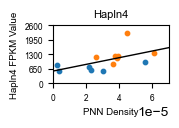


Association btwn Young, Aged, & All Decoder Score vs. Coherence:
R [Young, Aged, All]: 
0.33319194128745705 -0.5116902621991055 -0.47155545793824777
P [Young, MA, Aged, All]: 
0.5187070512407957 0.2404311033421337 0.10378975857104712


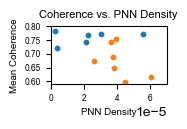

In [81]:
'''Plot 7R with all PNNs'''

#Hapln4 PNN
res = stats.linregress(youngPNN,hapln4[:6])
yslope2 = res.slope; yint2 = res.intercept; yr2 = res.rvalue; yp2 = res.pvalue

res = stats.linregress(agedPNN,hapln4[6:])
aslope2 = res.slope; aint2 = res.intercept; ar2 = res.rvalue ; ap2 = res.pvalue

res = stats.linregress(np.concatenate((youngPNN, agedPNN)),hapln4)
allslope2 = res.slope; allint2 = res.intercept; allr2 = res.rvalue; allp2 = res.pvalue

print('\nAssociation btwn Young, Aged, & All Decoder Score vs. hapln4:')
print('R [Young, Aged, All]: ')
print(yr2, ar2, allr2)
print('P [Young, MA, Aged, All]: ')
print(yp2, ap2, allp2)

#Plot Figure 7Ptop
fig, ax = plt.subplots(figsize = (1.5,0.75))
ax.set_title('Hapln4', fontsize = 8)
ax.scatter(youngPNN, hapln4[:6], color = 'C0', label = 'Young', s = 10)
ax.scatter(agedPNN, hapln4[6:], color = 'C1', label = 'Aged', s = 10)
ax.set_ylabel('Hapln4 FPKM Value', fontsize = 7)
ax.set_xlabel('PNN Density', fontsize = 7)
ax.set_ylim([0,2600])
ax.set_yticks([0,650,1300,1950,2600])
ax.set_xlim([0,7e-5])
ax.set_xticks([0,2e-5,4e-5,6e-5])
ax.tick_params(labelsize = 6)
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
#ax.plot(X_plot, yslope2*X_plot + yint2, '--', linewidth = 0.75, color = 'C0', label = 'Young Fit')
#ax.plot(X_plot, aslope2*X_plot + aint2, '--', linewidth = 0.75, color = 'C1', label = 'Aged')
ax.plot(X_plot, allslope2*X_plot + allint2, '-', linewidth = 1, color = 'k', label = 'All Ages')
#ax.legend(loc = 4, fontsize = 9, prop = {'size': 10})
#plt.savefig(save_folder + '7Ptop.png', dpi = 400, bbox_inches = 'tight')
#plt.savefig(save_folder + '7Ptop.svg', dpi = 400, bbox_inches = 'tight')
plt.show()

#Coherence vs PNN
res = stats.linregress(youngPNN,coherence[:6],)
yslope2 = res.slope; yint2 = res.intercept; yr2 = res.rvalue; yp2 = res.pvalue

res = stats.linregress(agedPNN,coherence[6:])
aslope2 = res.slope; aint2 = res.intercept; ar2 = res.rvalue ; ap2 = res.pvalue

res = stats.linregress(np.concatenate((youngPNN, agedPNN)),coherence)
allslope2 = res.slope; allint2 = res.intercept; allr2 = res.rvalue; allp2 = res.pvalue

print('\nAssociation btwn Young, Aged, & All Decoder Score vs. Coherence:')
print('R [Young, Aged, All]: ')
print(yr2, ar2, allr2)
print('P [Young, MA, Aged, All]: ')
print(yp2, ap2, allp2)

#Plot Figure 7:bottom
fig, ax = plt.subplots(figsize = (1.5,0.75))
ax.set_title('Coherence vs. PNN Density', fontsize = 8)
ax.scatter(youngPNN, coherence[:6], color = 'C0', label = 'Young', s = 10)
ax.scatter( agedPNN,coherence[6:], color = 'C1', label = 'Aged', s = 10)
ax.set_ylabel('Mean Coherence', fontsize = 7)
ax.set_xlabel('PNN Density', fontsize = 7)
ax.set_ylim([0.59,0.8])
ax.set_xlim([0,7e-5])
ax.set_xticks([0,2e-5,4e-5,6e-5])
ax.set_yticks([0.6,0.65,0.7,0.75,0.8])
ax.tick_params(labelsize = 6)
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
#ax.plot(X_plot, yslope2*X_plot + yint2, '--', linewidth = 0.75, color = 'C0', label = 'Young Fit')
#ax.plot(X_plot, aslope2*X_plot + aint2, '--', linewidth = 0.75, color = 'C1', label = 'Aged')
#ax.plot(X_plot, allslope2*X_plot + allint2, '-', linewidth = 1, color = 'k', label = 'All Ages')
#ax.legend(loc = 4, fontsize = 9, prop = {'size': 10})
#plt.savefig(save_folder + '7Pbottom.svg', dpi = 400, bbox_inches = 'tight')
#plt.savefig(save_folder + '7Pbottom.svg', dpi = 400, bbox_inches = 'tight')
plt.show()


In [82]:
''' Load in Animal Metadata '''

animalmeta = pd.read_csv('C:/Users/Python/Desktop/Dryad/MouseMetadata.csv') # adjust path name

# define some useful lists of animals based on metadata
all_aged_mice = np.array(animalmeta.loc[(animalmeta.Age_Group == 3),'Animal_ID'])
all_MA_mice = np.array(animalmeta.loc[(animalmeta.Age_Group == 2),'Animal_ID'])
all_young_mice = np.array(animalmeta.loc[(animalmeta.Age_Group == 1),'Animal_ID'])

cohorta_mice = np.array(animalmeta.loc[(animalmeta.Cohort == 'A'),'Animal_ID'])
cohortb_mice = np.array(animalmeta.loc[(animalmeta.Cohort == 'B'),'Animal_ID'])
cohortc_mice = np.array(animalmeta.loc[(animalmeta.Cohort == 'C'),'Animal_ID'])
cohortd_mice = np.array(animalmeta.loc[(animalmeta.Cohort == 'D'),'Animal_ID'])

RF_aged_mice = np.array(animalmeta.loc[(animalmeta.Age_Group == 3) & (animalmeta.Task == 'RF'),'Animal_ID'])
RF_young_mice = np.array(animalmeta.loc[(animalmeta.Age_Group == 1) & (animalmeta.Task == 'RF'),'Animal_ID'])
SM_aged_mice = np.array(animalmeta.loc[(animalmeta.Age_Group == 3) & (animalmeta.Task == 'SM'),'Animal_ID'])
SM_MA_mice = np.array(animalmeta.loc[(animalmeta.Age_Group == 2) & (animalmeta.Task == 'SM'),'Animal_ID'])
SM_young_mice = np.array(animalmeta.loc[(animalmeta.Age_Group == 1) & (animalmeta.Task == 'SM'),'Animal_ID'])

all_female_mice = np.array(animalmeta.loc[(animalmeta.Sex == 'F'),'Animal_ID'])
all_male_mice = np.array(animalmeta.loc[(animalmeta.Sex == 'M'), 'Animal_ID'])
RF_female_mice = np.array(animalmeta.loc[(animalmeta.Sex == 'F') & (animalmeta.Task == 'RF'),'Animal_ID'])
RF_male_mice = np.array(animalmeta.loc[(animalmeta.Sex == 'M') & (animalmeta.Task == 'RF'),'Animal_ID'])
SM_female_mice = np.array(animalmeta.loc[(animalmeta.Sex == 'F') & (animalmeta.Task == 'SM'),'Animal_ID'])
SM_male_mice = np.array(animalmeta.loc[(animalmeta.Sex == 'M') & (animalmeta.Task == 'SM'),'Animal_ID'])

animalmeta.head()

,Animal_ID,Task,Cohort,Probe_Control,Sex,Sac_Date,Frozen_Hemisphere,DOB,Age_WholeMonth,Age_ExtraDays,Age_Month,Aged_Days,Age_Group,Behavior_Sessions,Neural_Sessions
0,A3,RF,A,0,F,1/27/2021,R,4/23/2019,21,4,21.217,645,3,6,6
1,A4,RF,A,0,F,1/27/2021,R,4/23/2019,21,4,21.217,645,3,6,6
2,A5,RF,A,0,F,4/6/2021,L,4/23/2019,23,14,23.487,714,3,6,6
3,A6,RF,A,0,F,4/6/2021,R,4/23/2019,23,14,23.487,714,3,6,6
4,A7,RF,A,0,F,4/19/2021,L,5/29/2019,22,21,22.730,691,3,6,6


In [83]:
''' Complete List of Mice & Neural Sessions '''
all_mice = np.array(animalmeta.Animal_ID)

all_sessions = ([['0122_record1','0123_record2','0124_record3','0125_record4','0126_record5','0127_record6'], 
             ['0122_record1','0123_record2','0124_record3','0125_record4','0126_record5','0127_record6'],
             ['0401_record1','0401_record2b','0403_record3','0404_record4','0405_record5','0406_record6'],
             ['0401_record1','0402_record2','0403_record3','0404_record4','0405_record5','0406_record6'],
             ['0414_record1','0415_record2','0416_record3','0417_record4','0418_record5','0419_record6'],
             ['1024_record1','1025_record2','1026_record3','1027_record4','1028_record5_2'], #Y2_6 excluded
             ['1016_record1','1019_record3','1020_record4','1021_record5','1022_record6'], #Y3_2 not collected
             ['1114_record1','1115_record2','1116_record3','1117_record4','1118_record5','1119_record6'], # end cohort A
             ['051822_record1','051922_record2', '052022_record3','052122_record4','052222_record5','052322_record6'], 
             ['050522_record1','050622_record2','050722_record3','050822_record4','050922_record5','051022_record6'],
             ['050522_record1','050622_record2','050722_record3','050822_record4','051022_record6'], #Y11_5 not collected
             ['062222_record3','062322_record4','062522_record5'], #Y16_1 & 2 not collected, neural _6 excluded
             ['062822_record1','062922_record2','063022_record3','070122_record4','070222_record5','070322_record6'],
             ['062022_record1','062122_record2','062222_record3','062322_record4','062522_record5','062622_record6'],
             ['062822_record1','062922_record2','063022_record3','070122_record4','070222_record5','070322_record6'], 
             ['051922_record2','052022_record3'], # Y9 051822_1 excluded, end cohort B
             ['083022_record1','083122_record2','090122_record3'], 
             ['083022_record1','083122_record2','090122_record3','090222_record4','090322_record5','090422_record6'],
             ['083022_record1','083122_record2','090122_record3','090222_record4'], #behavior of A16_4, both of 5 excluded, 6 not collected 
             ['082322_record1','082422_record2','082522_record3','082622_record4','082722_record5','082822_record6'],
             ['082322_record1real','082422_record2','082522_record3','082622_record4','082722_record5','082822_record6'],
             ['102322_record1','102422_record2','102522_record3','102622_record4','102722_record5','102822_record6'],
             ['102322_record1','102422_record2','102522_record3','102622_record4','102722_record5','102822_record6'],
             ['102322_record1','102422_record2','102522_record3','102622_record4','102722_record5','102822_record6'],
             ['103122_record2','110122_record3','110222_record4','110322_record5rep','110422_record6','110522_record7'], #behavior of MA4M6, 7 excluded
             ['110622_record1','110722_record2','110822_record3','110922_record4','111022_record5','111122_record6'],
             ['103022_record1','103122_record2','110122_record3','110222_record4','110322_record5','110422_record6'],
             ['103022_record1','103122_record2','110122_record3','110222_record4'], #behavior of MA7_4, both 5 excluded, 6 not collected
             ['111322_record1','111422_record2','111522_record3','111622_record4','111722_record5','111822_record6'],
             ['111322_record1','111422_record2','111522_record3','111622_record4','111722_record5','111822_record6'],
             ['111322_record1','111422_record2','111522_record3','111622_record4','111722_record5','111822_record6'], 
             ['092522_record1','092622_record2','092722_record3','092822_record4','092922_record5','093022_record6'],
             ['091822_record1','091922_record2','092022_record3','092122_record4','092222_record5','092322_record6'],
             ['092522_record1','092622_record2','092722_record3','092822_record4','092922_record5','093022_record6'],
             ['092522_record1','092622_record2','092722_record3','092822_record4','092922_record5','093022_record6'],
             ['091822_record1','091922_record2','092022_record3','092122_record4','092222_record5','092322_record6'], #end cohortc
             ['012723_record2','012823_record3','012923_record4','013023_record5','013123_record6','020123_record7'],
             ['012623_record1','012723_record2','012823_record3','012923_record4','013023_record5','013123_record6'],
             ['012923_record2','013023_record3','013123_record4','020123_record5','020223_record6','020323_record7'],
             ['020923_record1','021023_record2','021123_record3','021223_record4','021323_record5','021423_record6'],
             ['022623_record1','022723_record2','022823_record3','030123_record4','030223_record5','030323_record6'],
             ['021623_record1','021723_record2','021823_record3','021923_record4','022023_record5','022123_record6'],
             ['021623_record1','021723_record2','021823_record3','021923_record4','022023_record5','022123_record6'],
             ['021623_record1','021723_record2','021823_record3','021923_record4','022023_record5rep','022123_record6'],
             ['022623_record1','022723_record2','022823_record3','030123_record4','030223_record5','030323_record6'] #end cohort d 
            ]) #list of sessions

In [84]:
'''Define which mice & sessions to load based on metadata'''
# Define mice, sessions for particular cohorts
mice , mice_ind, _  = np.intersect1d(all_mice,['Y2','Y3','Y16','Y17','Y18','Y19','A12','A13','A3','A4','A5','A6','A7'], return_indices = True)

sessions = []
for i in mice_ind:
    sessions.append(all_sessions[i])

# Make a dict to hold data
data = {}

for session, m in zip(sessions, mice):
    data[m] = {}
    
    for s in session:
        data[m][s] = {}

In [85]:
'''Get Indices of Stored Session, Animal Data Mice by Age Group'''
age_ind = []
y_ind = []
age_sind = []
y_sind = []

s_count = 0
for m, s in zip(mice, sessions):
    start = s_count
    end = len(s) + s_count

    if m in all_aged_mice:
        age_ind = np.append(age_ind, (np.where(mice == m)[0]))
        age_sind = np.append(age_sind, np.arange(start, end, 1))
    else:
        y_ind = np.append(y_ind, (np.where(mice == m)[0]))
        y_sind = np.append(y_sind, np.arange(start, end, 1))
                            
    s_count += len(s)
    
age_ind = age_ind.astype(int)
y_ind = y_ind.astype(int)
age_sind = age_sind.astype(int)
y_sind = y_sind.astype(int)

print(mice[y_ind], mice[age_ind])
print(len(mice[y_ind]), len(mice[age_ind]))
print(len(y_sind), len(age_sind))
Nold = len(mice[age_ind])
Nyoung = len(mice[y_ind])

['Y16' 'Y17' 'Y18' 'Y19' 'Y2' 'Y3'] ['A12' 'A13' 'A3' 'A4' 'A5' 'A6' 'A7']
6 7
31 42


In [59]:
''' Check out distribution of spatial cells '''

fig5_folder = 'C:/Users/Python/Desktop/LocalData/Figure5/' 
load_folder = 'C:/Users/Python/Desktop/LocalData/filtered/' # adjust path to match output of Import & Filter

per99 = []
sper99 = []
mper99 = []

for m, session in zip(mice,sessions):
    
    m_99 = []
    m_cells = []
    
    for s in tdqm(session):
        d = data[m][s]
        
        #load in data
        rawdata_file = 'RAW_' + m + '_' + s + '.npy'
        raw = np.load(load_folder + rawdata_file, allow_pickle=True)
        cell_IDs = raw.item().get('cellsfil')
        
        #load all spatial cell boolean
        spatialcell99_file = 'spatialcell99_' + m + '_' + s + '.npy'
        spatialcell = np.load(fig5_folder + spatialcell99_file)
        d['spatialcell'] = spatialcell
        spatialcells = cell_IDs[spatialcell]
        
        print(m + ', ' + s + ' n spatial cells: '+ str(np.sum(spatialcell)))
        per99 = np.append(per99, 100*np.sum(spatialcell)/len(cell_IDs))
        sper99 = np.append(sper99, 100*np.sum(spatialcell)/len(cell_IDs))
        m_99 = np.append(m_99, np.sum(spatialcell))
        m_cells = np.append(m_cells, len(cell_IDs))
        
    mper99 = np.append(mper99, np.sum(m_99)/np.sum(m_cells))

  0%|          | 0/6 [00:00<?, ?it/s]

A12, 051822_record1 n spatial cells: 86
A12, 051922_record2 n spatial cells: 241
A12, 052022_record3 n spatial cells: 128
A12, 052122_record4 n spatial cells: 62
A12, 052222_record5 n spatial cells: 93
A12, 052322_record6 n spatial cells: 32


  0%|          | 0/6 [00:00<?, ?it/s]

A13, 050522_record1 n spatial cells: 96
A13, 050622_record2 n spatial cells: 297
A13, 050722_record3 n spatial cells: 269
A13, 050822_record4 n spatial cells: 92
A13, 050922_record5 n spatial cells: 26
A13, 051022_record6 n spatial cells: 116


  0%|          | 0/6 [00:00<?, ?it/s]

A3, 0122_record1 n spatial cells: 17
A3, 0123_record2 n spatial cells: 7
A3, 0124_record3 n spatial cells: 15
A3, 0125_record4 n spatial cells: 86
A3, 0126_record5 n spatial cells: 5
A3, 0127_record6 n spatial cells: 29


  0%|          | 0/6 [00:00<?, ?it/s]

A4, 0122_record1 n spatial cells: 71
A4, 0123_record2 n spatial cells: 56
A4, 0124_record3 n spatial cells: 69
A4, 0125_record4 n spatial cells: 139
A4, 0126_record5 n spatial cells: 179
A4, 0127_record6 n spatial cells: 44


  0%|          | 0/6 [00:00<?, ?it/s]

A5, 0401_record1 n spatial cells: 20
A5, 0401_record2b n spatial cells: 81
A5, 0403_record3 n spatial cells: 67
A5, 0404_record4 n spatial cells: 99
A5, 0405_record5 n spatial cells: 16
A5, 0406_record6 n spatial cells: 19


  0%|          | 0/6 [00:00<?, ?it/s]

A6, 0401_record1 n spatial cells: 72
A6, 0402_record2 n spatial cells: 10
A6, 0403_record3 n spatial cells: 19
A6, 0404_record4 n spatial cells: 60
A6, 0405_record5 n spatial cells: 68
A6, 0406_record6 n spatial cells: 44


  0%|          | 0/6 [00:00<?, ?it/s]

A7, 0414_record1 n spatial cells: 82
A7, 0415_record2 n spatial cells: 147
A7, 0416_record3 n spatial cells: 153
A7, 0417_record4 n spatial cells: 158
A7, 0418_record5 n spatial cells: 103
A7, 0419_record6 n spatial cells: 74


  0%|          | 0/3 [00:00<?, ?it/s]

Y16, 062222_record3 n spatial cells: 54
Y16, 062322_record4 n spatial cells: 6
Y16, 062522_record5 n spatial cells: 1


  0%|          | 0/6 [00:00<?, ?it/s]

Y17, 062822_record1 n spatial cells: 59
Y17, 062922_record2 n spatial cells: 111
Y17, 063022_record3 n spatial cells: 63
Y17, 070122_record4 n spatial cells: 245
Y17, 070222_record5 n spatial cells: 214
Y17, 070322_record6 n spatial cells: 177


  0%|          | 0/6 [00:00<?, ?it/s]

Y18, 062022_record1 n spatial cells: 231
Y18, 062122_record2 n spatial cells: 193
Y18, 062222_record3 n spatial cells: 202
Y18, 062322_record4 n spatial cells: 100
Y18, 062522_record5 n spatial cells: 235
Y18, 062622_record6 n spatial cells: 139


  0%|          | 0/6 [00:00<?, ?it/s]

Y19, 062822_record1 n spatial cells: 102
Y19, 062922_record2 n spatial cells: 106
Y19, 063022_record3 n spatial cells: 78
Y19, 070122_record4 n spatial cells: 190
Y19, 070222_record5 n spatial cells: 205
Y19, 070322_record6 n spatial cells: 175


  0%|          | 0/5 [00:00<?, ?it/s]

Y2, 1024_record1 n spatial cells: 79
Y2, 1025_record2 n spatial cells: 22
Y2, 1026_record3 n spatial cells: 63
Y2, 1027_record4 n spatial cells: 6
Y2, 1028_record5_2 n spatial cells: 11


  0%|          | 0/5 [00:00<?, ?it/s]

Y3, 1016_record1 n spatial cells: 42
Y3, 1019_record3 n spatial cells: 36
Y3, 1020_record4 n spatial cells: 71
Y3, 1021_record5 n spatial cells: 101
Y3, 1022_record6 n spatial cells: 106


In [62]:
''' Define ColorMaps for Session & Animal Boxplots '''
import matplotlib.pylab as pl
import matplotlib.lines as mlines

col_animal_old = pl.cm.Oranges([np.linspace(0.2,0.9,Nold)])
col_animal_young = pl.cm.Blues([np.linspace(0.2,0.9,Nyoung)])
col_animal = [col_animal_young, col_animal_old]

col_session_young = []
col_session_old = []
for m, session in zip(mice, sessions):
    print(m)
    
    for s in range(0,len(session)):
        
        if m in RF_aged_mice:
            idx = np.where(mice == m)[0][0]
            col_session_old.append(col_animal[1][0][idx])
        else:
            idx = np.where(mice == m)[0][0] - Nold
            col_session_young.append(col_animal[0][0][idx])

col_session = [col_session_young,col_session_old]

label_mice = ['Y16', 'Y17', 'Y18', 'Y19', 'Y2', 'Y3','A12', 'A13', 'A3', 'A4', 'A5', 'A6', 'A7']

# set up handles
from itertools import repeat
per99 = [mper99[y_ind], mper99[age_ind]]

handles = []
for i in range(len(per99)):
    for c in col_animal[i][0]:
        dot = mlines.Line2D([],[], color = c, marker ='o', linestyle = 'None', markersize = 8)
        handles.append(dot)

A12
A13
A3
A4
A5
A6
A7
Y16
Y17
Y18
Y19
Y2
Y3


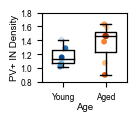

In [135]:
'Plot 7O'

fig, ax = plt.subplots(figsize = (1.1,0.9))
per99 = [youngPV,agedPV]
labels = ['Young','Aged']
w = 0.5

plt.boxplot(per99, widths = w, labels = labels, medianprops = dict(color = 'black'))
#ax.set_title('Session Spatial Cell Density', fontsize=12, pad=5)
ax.set_xlabel('Age', fontsize=7, labelpad=1)
ax.set_xticklabels(labels = labels, fontsize=6)
ax.set_ylabel('PV+ IN Density', fontsize=7, labelpad=1)
ax.set_ylim([0.8e-4,1.8e-4])
ax.set_yticks([0.8e-4,1.0e-4,1.2e-4,1.4e-4,1.6e-4,1.8e-4])
ax.set_yticklabels([0.8,1.0,1.2,1.4,1.6,1.8])
ax.tick_params(labelsize = 6)

for i in range(len(per99)):
    y = per99[i]
    x = np.random.normal(i + 1, 0.04, len(y))
    plt.scatter(x, y, color = col_animal[i][0], edgecolors = col_animal[i][0], alpha = 1, s = 10)

#ax.legend(ncol = 3, handles = handles, labels = label_mice, loc = 'upper right',bbox_to_anchor=(1.65, 1))
plt.savefig(save_folder + '7O.png', dpi=400, bbox_inches='tight')
plt.savefig(save_folder + '7O.svg', dpi=400, bbox_inches='tight')
plt.show()

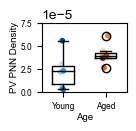

In [143]:
'Plot 7P'

#Plot Figure 5d
fig, ax = plt.subplots(figsize = (1.1,0.9))
per99 = [youngPNN,agedPNN]
labels = ['Young','Aged']
w = 0.5

plt.boxplot(per99, widths = w, labels = labels, medianprops = dict(color = 'black'))
#ax.set_title('Session Spatial Cell Density', fontsize=12, pad=5)
ax.set_xlabel('Age', fontsize=7, labelpad=1)
ax.set_xticklabels(labels = labels, fontsize=6)
ax.set_ylabel('PV PNN Density', fontsize=7, labelpad=1)
ax.set_ylim([0,7.5e-5])
ax.set_yticks([0,2.5e-5,5e-5,7.5e-5])

ax.tick_params(labelsize = 6)

for i in range(len(per99)):
    y = per99[i]
    x = np.random.normal(i + 1, 0.04, len(y))
    plt.scatter(x, y, color = col_animal[i][0], edgecolors = col_animal[i][0], alpha = 1, s = 10)

#ax.legend(ncol = 3, handles = handles, labels = label_mice, loc = 'upper right',bbox_to_anchor=(1.65, 1))
plt.savefig(save_folder + '7P.png', dpi=400, bbox_inches='tight')
plt.savefig(save_folder + '7P.svg', dpi=400, bbox_inches='tight')
plt.show()

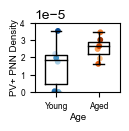

In [141]:
'Plot 7Q'

fig, ax = plt.subplots(figsize = (1.1,0.9))
per99 = [youngPVPNN,agedPVPNN]
labels = ['Young','Aged']
w = 0.5

plt.boxplot(per99, widths = w, labels = labels, medianprops = dict(color = 'black'))
#ax.set_title('Session Spatial Cell Density', fontsize=12, pad=5)
ax.set_xlabel('Age', fontsize=7, labelpad=1)
ax.set_xticklabels(labels = labels, fontsize=6)
ax.set_ylabel('PV+ PNN Density', fontsize=7, labelpad=1)
ax.set_ylim([0,4e-5])
ax.tick_params(labelsize = 6)

for i in range(len(per99)):
    y = per99[i]
    x = np.random.normal(i + 1, 0.04, len(y))
    plt.scatter(x, y, color = col_animal[i][0], edgecolors = col_animal[i][0], alpha = 1, s = 10)

#ax.legend(ncol = 3, handles = handles, labels = label_mice, loc = 'upper right',bbox_to_anchor=(1.65, 1))
plt.savefig(save_folder + '7Q.png', dpi=400, bbox_inches='tight')
plt.savefig(save_folder + '7Q.svg', dpi=400, bbox_inches='tight')
plt.show()

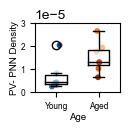

In [138]:
'Plot 7R'

#Plot Figure 5d
fig, ax = plt.subplots(figsize = (1.1,0.9))
per99 = [youngEXPNN,agedEXPNN]
labels = ['Young','Aged']
w = 0.5

plt.boxplot(per99, widths = w, labels = labels, medianprops = dict(color = 'black'))
#ax.set_title('Session Spatial Cell Density', fontsize=12, pad=5)
ax.set_xlabel('Age', fontsize=7, labelpad=1)
ax.set_xticklabels(labels = labels, fontsize=6)
ax.set_ylabel('PV- PNN Density', fontsize=7, labelpad=1)
ax.set_ylim([0,3e-5])
ax.tick_params(labelsize = 6)

for i in range(len(per99)):
    y = per99[i]
    x = np.random.normal(i + 1, 0.04, len(y))
    plt.scatter(x, y, color = col_animal[i][0], edgecolors = col_animal[i][0], alpha = 1, s = 10)

#ax.legend(ncol = 3, handles = handles, labels = label_mice, loc = 'upper right',bbox_to_anchor=(1.65, 1))
plt.savefig(save_folder + '7R.png', dpi=400, bbox_inches='tight')
plt.savefig(save_folder + '7R.svg', dpi=400, bbox_inches='tight')
plt.show()

In [168]:
allagedeg = pd.read_csv('C:/Users/Python/Downloads/mec_deseq_112124F_vs_M-Aged.csv') # adjust path name
ageddegonly = pd.read_csv('C:/Users/Python/Downloads/ageddeg.csv') # adjust path name

ageddegonly.head()

,Unnamed: 0,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,A15,A17,A18,A19,A20,A24
0,5102,Eif2s3y,1251.061294,8.312127,0.582645,14.266184,3.560000e-46,6.510000e-42,3.543217,5.746371,23.619806,2567.655477,2156.178380,2749.624514
1,9325,Kdm5d,622.355166,8.382462,0.638241,13.133687,2.110000e-39,1.930000e-35,1.626694,1.851584,9.655012,1201.037795,1308.230183,1211.729727
2,17685,Xist,6616.629783,-15.838990,1.240591,-12.767295,2.500000e-37,1.520000e-33,8013.790156,14421.815150,17264.173390,0.000000,0.000000,0.000000
3,4463,Ddx3y,1479.749889,9.469201,0.786608,12.038021,2.240000e-33,1.030000e-29,4.171726,9.772703,0.451318,2379.418666,1709.300506,4775.384413
4,17294,Uty,1304.620655,7.124157,0.800853,8.895712,5.800000e-19,2.130000e-15,5.987308,4.334313,53.421166,1827.007420,1520.908099,4416.065621


In [169]:
allagedeg.head()

,Unnamed: 0,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Y20,Y22,...,MA5,MA6,MA8,MA10,A15,A17,A18,A19,A20,A24
0,3079,Ccna2,215.093249,2.810369,0.586991,4.787751,0.000002,0.030921,511.044230,249.811904,...,131.226782,270.050204,188.816504,191.962652,122.139122,141.325660,174.899300,243.843253,201.887959,424.426281
1,2895,Cast,209.833140,-3.965477,0.939567,-4.220537,0.000024,0.223407,88.953618,122.262843,...,74.365770,100.091356,43.942614,160.835545,255.900477,188.611997,91.333600,180.508605,44.377601,66.347682
2,2830,Capn11,111.571795,3.620672,0.937062,3.863856,0.000112,0.362570,124.085097,83.191351,...,58.340415,48.300080,93.900147,100.551762,39.855024,128.469299,62.436445,228.328995,389.998506,59.418491
3,7489,Gm26834,33.589444,3.364763,0.847624,3.969641,0.000072,0.362570,71.919009,64.635511,...,8.464436,25.298351,26.857780,22.671528,21.774365,26.261250,31.039957,40.612412,34.486047,37.652959
4,13882,RP23-407E2.6,438.755183,9.858319,2.534316,3.889933,0.000100,0.362570,281.040254,908.226320,...,3123.971942,472.401851,0.000000,0.000000,0.203991,4.133217,4.839559,65.504225,6.759766,1260.287786


In [172]:
genenames = list(np.array(ageddegonly['gene']))
print(len(genenames))

allgenenames = list(np.array(allagedeg['Gene']))
print(len(allgenenames))

filtered_allagedeg = allagedeg[allagedeg['Gene'].isin(genenames)]
r,c = filtered_allagedeg.shape
print(r)

filtered_allagedeg.head()
filtered_allagedeg.to_csv('C:/Users/Python/Downloads/filtered_mec_deseq_112124F_vs_M-Aged.csv', index=False)

112
18360
112


In [116]:
s8dbehavior = pd.read_csv('C:/Users/Python/Downloads/S8D_Behavior.csv') # adjust path name
s8dbehavior.head()

,Gene,r,T,p,sig
0,RP24-359F24.1,-0.750228,4.538722,0.000336,1
1,Mpnd,0.735185,4.338234,0.000509,1
2,Dxo,0.726502,4.228984,0.000639,1
3,Tmem106a,-0.713216,4.070028,0.000891,1
4,Mtpn,-0.706642,3.994748,0.001043,1


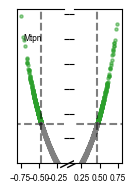

In [117]:
''' Plot Figure S8D Left'''


sigcorrR = np.array(s8dbehavior.loc[(s8dbehavior.sig == 1),'r'])
nscorrR = np.array(s8dbehavior.loc[(s8dbehavior.sig == 0),'r'])

sigcorrp = np.array(s8dbehavior.loc[(s8dbehavior.sig == 1),'p'])
nscorrp = np.array(s8dbehavior.loc[(s8dbehavior.sig == 0),'p'])

gabra2p = np.array(s8dbehavior.loc[(s8dbehavior.Gene == 'Gabra2'),'p'])
gabra2r = np.array(s8dbehavior.loc[(s8dbehavior.Gene == 'Gabra2'),'r'])
mtpnp = np.array(s8dbehavior.loc[(s8dbehavior.Gene == 'Mtpn'),'p'])
mtpnr = np.array(s8dbehavior.loc[(s8dbehavior.Gene == 'Mtpn'),'r'])

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (1.35,2),sharey = True)
fig.subplots_adjust(wspace = 0.2)
ax1.scatter(sigcorrR,-1*np.log10(sigcorrp), color = 'C2', alpha = 0.5, s = 5)
ax1.scatter(nscorrR,-1*np.log10(nscorrp), color = 'grey', alpha = 0.5, s = 5)
ax1.set_xlim([-0.8,-0.15])
ax1.set_xticks([-0.75,-0.5,-0.25])
#ax1.set_ylim([0.85,3.75])
ax2.scatter(sigcorrR,-1*np.log10(sigcorrp), color = 'C2', alpha = 0.5, s = 5)
ax2.scatter(nscorrR,-1*np.log10(nscorrp), color = 'grey', alpha = 0.5, s = 5)
ax2.set_xlim([0.15,0.8])
ax2.set_xticks([0.25,0.5,0.75])
ax2.set_ylim([0.5,3.6])
ax2.set_yticks([0.5,1,1.5,2,2.5,3,3.5])
ax1.spines.right.set_visible(False)
ax2.spines.left.set_visible(False)
ax1.yaxis.tick_right()
ax1.tick_params(labelright=False, labelsize = 6)
ax2.tick_params(labelsize = 6)
ax2.yaxis.tick_left()

ax1.hlines(np.max(-1*np.log10(nscorrp)),-1,1,'k','--',alpha = 0.5)
ax2.hlines(np.max(-1*np.log10(nscorrp)),-1,1,'k','--',alpha = 0.5)
ax1.vlines(np.min(nscorrR),0.5,3.6,'k','--',alpha = 0.5)
ax2.vlines(np.max(nscorrR),0.5,3.6,'k','--',alpha = 0.5)

#ax2.annotate('Gabra2',(gabra2r,-1*np.log10(gabra2p)),fontsize = 6)
ax1.annotate('Mtpn',(mtpnr,-1*np.log10(mtpnp)),fontsize = 6)

#add slant broken line
d = 0.5
kwargs = dict(marker=[(-1,-d),(1,d)], markersize = 12, linestyle = "none",color = 'k', mec = 'k', mew = 1, clip_on=False)
ax1.plot([1.08,1.22],[0,0], transform=ax1.transAxes,**kwargs)
#ax2.plot([0,1],[1,1], transform=ax2.transAxes,**kwargs)

plt.savefig(save_folder + 'S8Dleft.png', dpi = 400, bbox_inches = 'tight')
plt.savefig(save_folder + 'S8Dleft.svg', dpi = 400, bbox_inches = 'tight')
plt.show()


In [118]:
print(np.max(-1*np.log10(sigcorrp)))
print(np.min(-1*np.log10(sigcorrp)))
print(np.max(sigcorrR))
print(np.min(sigcorrR))

3.474192282997076
1.301220597215884
0.735185393
-0.750227666


In [119]:
s8dfrac = pd.read_csv('C:/Users/Python/Downloads/S8D_fracaligned.csv') # adjust path name
s8dfrac.head()

,Gene,r,T,p,sig
0,Mettl21b,-0.791457,5.179475,0.000091,1
1,Mtpn,-0.785361,5.074717,0.000113,1
2,Tmem106a,-0.748651,4.516986,0.000351,1
3,RP24-359F24.1,-0.747417,4.500109,0.000363,1
4,Gss,0.728026,4.247834,0.000614,1


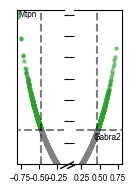

In [120]:
''' Plot Figure S8D Middle'''

sigcorrR = np.array(s8dfrac.loc[(s8dfrac.sig == 1),'r'])
nscorrR = np.array(s8dfrac.loc[(s8dfrac.sig == 0),'r'])

sigcorrp = np.array(s8dfrac.loc[(s8dfrac.sig == 1),'p'])
nscorrp = np.array(s8dfrac.loc[(s8dfrac.sig == 0),'p'])

gabra2p = np.array(s8dfrac.loc[(s8dfrac.Gene == 'Gabra2'),'p'])
gabra2r = np.array(s8dfrac.loc[(s8dfrac.Gene == 'Gabra2'),'r'])
mtpnp = np.array(s8dfrac.loc[(s8dfrac.Gene == 'Mtpn'),'p'])
mtpnr = np.array(s8dfrac.loc[(s8dfrac.Gene == 'Mtpn'),'r'])

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (1.35,2),sharey = True)
fig.subplots_adjust(wspace = 0.2)
ax1.scatter(sigcorrR,-1*np.log10(sigcorrp), color = 'C2', alpha = 0.5, s = 5)
ax1.scatter(nscorrR,-1*np.log10(nscorrp), color = 'grey', alpha = 0.5, s = 5)
ax1.set_xlim([-0.8,-0.15])
ax1.set_xticks([-0.75,-0.5,-0.25])
#ax1.set_ylim([0.85,3.75])
ax2.scatter(sigcorrR,-1*np.log10(sigcorrp), color = 'C2', alpha = 0.5, s = 5)
ax2.scatter(nscorrR,-1*np.log10(nscorrp), color = 'grey', alpha = 0.5, s = 5)
ax2.set_xlim([0.15,0.8])
ax2.set_xticks([0.25,0.5,0.75])
ax2.set_ylim([0.5,4.1])
ax2.set_yticks([0.5,1,1.5,2,2.5,3,3.5,4])
ax1.spines.right.set_visible(False)
ax2.spines.left.set_visible(False)
ax1.yaxis.tick_right()
ax1.tick_params(labelright=False, labelsize = 6)
ax2.tick_params(labelsize = 6)
ax2.yaxis.tick_left()

ax1.hlines(np.max(-1*np.log10(nscorrp)),-1,1,'k','--',alpha = 0.5)
ax2.hlines(np.max(-1*np.log10(nscorrp)),-1,1,'k','--',alpha = 0.5)
ax1.vlines(np.min(nscorrR),0.5,4.1,'k','--',alpha = 0.5)
ax2.vlines(np.max(nscorrR),0.5,4.1,'k','--',alpha = 0.5)

ax2.annotate('Gabra2',(gabra2r,-1*np.log10(gabra2p)),fontsize = 6)
ax1.annotate('Mtpn',(mtpnr,-1*np.log10(mtpnp)),fontsize = 6)

#add slant broken line
d = 0.5
kwargs = dict(marker=[(-1,-d),(1,d)], markersize = 12, linestyle = "none",color = 'k', mec = 'k', mew = 1, clip_on=False)
ax1.plot([1.08,1.22],[0,0], transform=ax1.transAxes,**kwargs)
#ax2.plot([0,1],[1,1], transform=ax2.transAxes,**kwargs)

plt.savefig(save_folder + 'S8Dmiddle.png', dpi = 400, bbox_inches = 'tight')
plt.savefig(save_folder + 'S8Dmiddle.svg', dpi = 400, bbox_inches = 'tight')
plt.show()


In [121]:
print(np.max(-1*np.log10(sigcorrp)))
print(np.min(-1*np.log10(sigcorrp)))

print(np.max(sigcorrR))
print(np.min(sigcorrR))

4.039564899819547
1.3018209838441537
0.728025571
-0.791456602


In [122]:
s8dremap = pd.read_csv('C:/Users/Python/Downloads/S8D_remap.csv') # adjust path name
s8dremap.head()

,Gene,r,T,p,sig
0,Ssbp4,-0.869941,7.056121,0.000003,1
1,Gabra2,-0.869417,7.038677,0.000003,1
2,Dynlt1b,-0.865978,6.926675,0.000003,1
3,Gm15446,0.853121,6.540908,0.000007,1
4,Pcid2,-0.817698,5.681932,0.000034,1


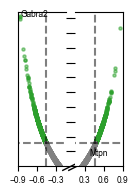

In [123]:
''' Plot Figure S8D Right'''

sigcorrR = np.array(s8dremap.loc[(s8dremap.sig == 1),'r'])
nscorrR = np.array(s8dremap.loc[(s8dremap.sig == 0),'r'])

sigcorrp = np.array(s8dremap.loc[(s8dremap.sig == 1),'p'])
nscorrp = np.array(s8dremap.loc[(s8dremap.sig == 0),'p'])

gabra2p = np.array(s8dremap.loc[(s8dremap.Gene == 'Gabra2'),'p'])
gabra2r = np.array(s8dremap.loc[(s8dremap.Gene == 'Gabra2'),'r'])
mtpnp = np.array(s8dremap.loc[(s8dremap.Gene == 'Mtpn'),'p'])
mtpnr = np.array(s8dremap.loc[(s8dremap.Gene == 'Mtpn'),'r'])

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (1.35,2),sharey = True)
fig.subplots_adjust(wspace = 0.2)
ax1.scatter(sigcorrR,-1*np.log10(sigcorrp), color = 'C2', alpha = 0.5, s = 5)
ax1.scatter(nscorrR,-1*np.log10(nscorrp), color = 'grey', alpha = 0.5, s = 5)
ax1.set_xlim([-0.9,-0.15])
ax1.set_xticks([-0.9,-0.6,-0.3])
ax2.scatter(sigcorrR,-1*np.log10(sigcorrp), color = 'C2', alpha = 0.5, s = 5)
ax2.scatter(nscorrR,-1*np.log10(nscorrp), color = 'grey', alpha = 0.5, s = 5)
ax2.set_xlim([0.15,0.9])
ax2.set_xticks([0.3,0.6,0.9])
ax2.set_ylim([0.5,5.7])
ax2.set_yticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5])
ax1.spines.right.set_visible(False)
ax2.spines.left.set_visible(False)
ax1.yaxis.tick_right()
ax1.tick_params(labelright=False, labelsize = 6)
ax2.tick_params(labelsize = 6)
ax2.yaxis.tick_left()

ax1.hlines(np.max(-1*np.log10(nscorrp)),-1,1,'k','--',alpha = 0.5)
ax2.hlines(np.max(-1*np.log10(nscorrp)),-1,1,'k','--',alpha = 0.5)
ax1.vlines(np.min(nscorrR),0.5,5.7,'k','--',alpha = 0.5)
ax2.vlines(np.max(nscorrR),0.5,5.7,'k','--',alpha = 0.5)

ax1.annotate('Gabra2',(gabra2r,-1*np.log10(gabra2p)),fontsize = 6)
ax2.annotate('Mtpn',(mtpnr,-1*np.log10(mtpnp)),fontsize = 6)

#add slant broken line
d = 0.5
kwargs = dict(marker=[(-1,-d),(1,d)], markersize = 12, linestyle = "none",color = 'k', mec = 'k', mew = 1, clip_on=False)
ax1.plot([1.08,1.22],[0,0], transform=ax1.transAxes,**kwargs)
#ax2.plot([0,1],[1,1], transform=ax2.transAxes,**kwargs)

plt.savefig(save_folder + 'S8Dright.png', dpi = 400, bbox_inches = 'tight')
plt.savefig(save_folder + 'S8Dright.svg', dpi = 400, bbox_inches = 'tight')
plt.show()


In [124]:
print(np.max(-1*np.log10(sigcorrp)))
print(np.min(-1*np.log10(sigcorrp)))

print(np.max(sigcorrR))
print(np.min(sigcorrR))

5.566118207712854
1.3023215081575306
0.853120547
-0.869941175


In [128]:
behavior = [0.257799,0.311668,0.321791,0.319969,0.303089,0.322289,0.421861,0.41576,0.445066,0.403321,0.415839,0.432759,0.060951,0.055986,0.087271,0.025026,0.04029,0.050669]
fracaligned = [0.126553,0.151863,0.151863,0.126553,0.151863,0.126552,0.154545,0.110389,0.154545,0.176623,0.132467,0.132467,-0.049954,-0.039964,-0.049955,-0.059946,-0.059946,-0.059946]
remapfreq = [0.071971,0.0754,0.0754,0.091645,0.095074,0.091645,0.15783,0.128946,0.132446,0.142946,0.15223,0.15643,0.131168,0.123771,0.145961,0.158238,0.158238,0.158238]
mtpn = [2077.613307,1680.409735,1713.971316,1844.118878,1780.820656,1984.860489,2156.837812,1836.161707,1989.678908,1551.350236,2253.11969,1692.371425,3704.186916,2657.341693,3136.999221,1854.415688,2804.86934,3012.776551]
gabra2 = [15759.13646,11235.44523,23606.63313,11091.98657,16717.31204,21455.4798,1805.136953,2082.048142,1039.74403,1169.752883,936.5640468,2444.497356,4344.601994,1139.070836,2915.195789,1792.112699,886.1942631,1413.803835]
egr1 = [1046.813834,1910.143313,1768.46177,3563.943914,1109.375195,2482.352907,3174.649182,1696.101779,1399.826301,1650.854012,2792.348611,2125.798969,3330.430531,3189.258313,4443.43422,1391.719477,1725.042651,1479.942271]
arc = [2596.988733,3534.566302,4750.366731,4492.280658,2835.214967,3518.543982,4309.795667,4478.890383,1159.850154,3494.217766,4256.690128,704.435914,6758.533199,6395.058947,5332.508232,2742.934978,1934.945579,2245.915838]


Association btwn Young, MA, Aged, & All Mtpn vs. Change in Alt Frac. Req
R [Young, Aged, All]: 
-0.6073658832297203 0.2269916366302728 0.6881929495886212 -0.7066421464280799
P [Young, MA, Aged, All]: 
0.20097778253419524 0.6653604401442892 0.13067794733666344 0.0010434830929581397


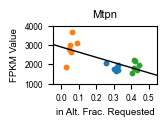


Association btwn Young, MA, Aged, & All Change in Alt. Frac ALigned:
R [Young, Aged, All]: 
-0.854772189082721 -0.230145408595067 0.2840847557220249 -0.785360883938715
P [Young, MA, Aged, All]: 
0.030105167215247728 0.6608769325755178 0.5853362755637253 0.00011259646759687579


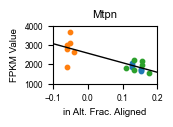


Association btwn Young, MA, Aged, & All Change in Alt. Frac ALigned:
R [Young, Aged, All]: 
-0.028544379590161168 0.1999932886870057 -0.3883781874264254 -0.8694166848386659
P [Young, MA, Aged, All]: 
0.9571950593324833 0.7040096643042242 0.4467237389002676 2.799733649282276e-06


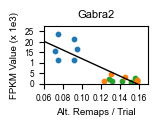

In [158]:
#Left
res = stats.linregress(behavior[:6],mtpn[:6])
yslope2 = res.slope; yint2 = res.intercept; yr2 = res.rvalue; yp2 = res.pvalue

res = stats.linregress(behavior[6:12],mtpn[6:12])
maslope2 = res.slope; maint2 = res.intercept; mar2 = res.rvalue ; map2 = res.pvalue

res = stats.linregress(behavior[12:],mtpn[12:])
aslope2 = res.slope; aint2 = res.intercept; ar2 = res.rvalue ; ap2 = res.pvalue

res = stats.linregress(behavior,mtpn)
allslope2 = res.slope; allint2 = res.intercept; allr2 = res.rvalue; allp2 = res.pvalue

print('\nAssociation btwn Young, MA, Aged, & All Mtpn vs. Change in Alt Frac. Req')
print('R [Young, Aged, All]: ')
print(yr2, mar2, ar2, allr2)
print('P [Young, MA, Aged, All]: ')
print(yp2, map2, ap2, allp2)

#Plot Figure S8Eleft
fig, ax = plt.subplots(figsize = (1.35,0.75))
ax.set_title('Mtpn', fontsize = 8)
ax.scatter(behavior[:6],mtpn[:6], color = 'C0', label = 'Young', s = 10)
ax.scatter(behavior[6:12],mtpn[6:12], color = 'C2', label = 'MA', s = 10)
ax.scatter(behavior[12:],mtpn[12:], color = 'C1', label = 'Aged', s = 10)
ax.set_xlabel('in Alt. Frac. Requested', fontsize = 7)
ax.set_ylabel('FPKM Value', fontsize = 7)
ax.set_xlim([-0.05,0.55])
ax.set_ylim([1000,4000])
ax.set_yticks([1000,2000,3000,4000])
ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5])
ax.tick_params(labelsize = 6)
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
#ax.plot(X_plot, yslope2*X_plot + yint2, '--', linewidth = 0.75, color = 'C0', label = 'Young Fit')
#ax.plot(X_plot, aslope2*X_plot + aint2, '--', linewidth = 0.75, color = 'C1', label = 'Aged')
ax.plot(X_plot, allslope2*X_plot + allint2, '-', linewidth = 1, color = 'k', label = 'All Ages')
#ax.legend(loc = 4, fontsize = 9, prop = {'size': 10})
plt.savefig(save_folder + 'S8Eleft.png', dpi = 400, bbox_inches = 'tight')
plt.savefig(save_folder + 'S8Eleft.svg', dpi = 400, bbox_inches = 'tight')
plt.show()

#Middle
res = stats.linregress(fracaligned[:6],mtpn[:6])
yslope2 = res.slope; yint2 = res.intercept; yr2 = res.rvalue; yp2 = res.pvalue

res = stats.linregress(fracaligned[6:12],mtpn[6:12])
maslope2 = res.slope; maint2 = res.intercept; mar2 = res.rvalue ; map2 = res.pvalue

res = stats.linregress(fracaligned[12:],mtpn[12:])
aslope2 = res.slope; aint2 = res.intercept; ar2 = res.rvalue ; ap2 = res.pvalue

res = stats.linregress(fracaligned, mtpn)
allslope2 = res.slope; allint2 = res.intercept; allr2 = res.rvalue; allp2 = res.pvalue

print('\nAssociation btwn Young, MA, Aged, & All Change in Alt. Frac ALigned:')
print('R [Young, Aged, All]: ')
print(yr2, mar2, ar2, allr2)
print('P [Young, MA, Aged, All]: ')
print(yp2, map2, ap2, allp2)

#Plot Figure S8Emiddle
fig, ax = plt.subplots(figsize = (1.35,0.75))
ax.set_title('Mtpn', fontsize = 8)
ax.scatter(fracaligned[:6],mtpn[:6], color = 'C0', label = 'Young', s = 10)
ax.scatter(fracaligned[6:12],mtpn[6:12], color = 'C2', label = 'MA', s = 10)
ax.scatter(fracaligned[12:],mtpn[12:], color = 'C1', label = 'Aged', s = 10)
ax.set_xlabel('in Alt. Frac. Aligned', fontsize = 7)
ax.set_ylabel('FPKM Value', fontsize = 7)
ax.set_xlim([-0.1,0.2])
ax.set_ylim([1000,4000])
ax.set_yticks([1000,2000,3000,4000])
ax.set_xticks([-0.1,0,0.1,0.2])
ax.tick_params(labelsize = 6)
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
#ax.plot(X_plot, yslope2*X_plot + yint2, '--', linewidth = 0.75, color = 'C0', label = 'Young Fit')
#ax.plot(X_plot, aslope2*X_plot + aint2, '--', linewidth = 0.75, color = 'C1', label = 'Aged')
ax.plot(X_plot, allslope2*X_plot + allint2, '-', linewidth = 1, color = 'k', label = 'All Ages')
#ax.legend(loc = 4, fontsize = 9, prop = {'size': 10})
plt.savefig(save_folder + 'S8Emiddle.png', dpi = 400, bbox_inches = 'tight')
plt.savefig(save_folder + 'S8Emiddle.svg', dpi = 400, bbox_inches = 'tight')
plt.show()

#Right
res = stats.linregress(remapfreq[:6],gabra2[:6])
yslope2 = res.slope; yint2 = res.intercept; yr2 = res.rvalue; yp2 = res.pvalue

res = stats.linregress(remapfreq[6:12],gabra2[6:12])
maslope2 = res.slope; maint2 = res.intercept; mar2 = res.rvalue ; map2 = res.pvalue

res = stats.linregress(remapfreq[12:],gabra2[12:])
aslope2 = res.slope; aint2 = res.intercept; ar2 = res.rvalue ; ap2 = res.pvalue

res = stats.linregress(remapfreq, gabra2)
allslope2 = res.slope; allint2 = res.intercept; allr2 = res.rvalue; allp2 = res.pvalue

print('\nAssociation btwn Young, MA, Aged, & All Change in Alt. Frac ALigned:')
print('R [Young, Aged, All]: ')
print(yr2, mar2, ar2, allr2)
print('P [Young, MA, Aged, All]: ')
print(yp2, map2, ap2, allp2)

#Plot Figure S8Eright
fig, ax = plt.subplots(figsize = (1.35,0.75))
ax.set_title('Gabra2', fontsize = 8)
ax.scatter(remapfreq[:6],gabra2[:6], color = 'C0', label = 'Young', s = 10)
ax.scatter(remapfreq[6:12],gabra2[6:12], color = 'C2', label = 'MA', s = 10)
ax.scatter(remapfreq[12:],gabra2[12:], color = 'C1', label = 'Aged', s = 10)
ax.set_xlabel('Alt. Remaps / Trial', fontsize = 7)
ax.set_ylabel('FPKM Value (x 1e3)', fontsize = 7)
ax.set_xlim([0.06,0.17])
ax.set_ylim([-100,27500])
ax.set_yticks([0,5000,10000,15000,20000,25000])
ax.set_yticklabels([0,5,1,15,20,25])
ax.set_xticks([0.06,0.08,0.10,0.12,0.14,0.16])
ax.tick_params(labelsize = 6)
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
#ax.plot(X_plot, yslope2*X_plot + yint2, '--', linewidth = 0.75, color = 'C0', label = 'Young Fit')
#ax.plot(X_plot, aslope2*X_plot + aint2, '--', linewidth = 0.75, color = 'C1', label = 'Aged')
ax.plot(X_plot, allslope2*X_plot + allint2, '-', linewidth = 1, color = 'k', label = 'All Ages')
#ax.legend(loc = 4, fontsize = 9, prop = {'size': 10})
plt.savefig(save_folder + 'S8Eright.png', dpi = 400, bbox_inches = 'tight')
plt.savefig(save_folder + 'S8Eright.svg', dpi = 400, bbox_inches = 'tight')
plt.show()


Association btwn Young, MA, Aged, & All egr1 vs. Change in Alt Frac. Req
R [Young, Aged, All]: 
0.634216460836225 -0.1838348522120269 0.9063587652800464 -0.1617133002889403
P [Young, MA, Aged, All]: 
0.17622591690794626 0.7273540943420097 0.012742466209460493 0.5214723933964371


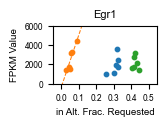


Association btwn Young, MA, Aged, & All Change in Alt. Frac ALigned:
R [Young, Aged, All]: 
0.10846462738339158 -0.13761243555985495 0.8932595652075174 -0.24021296664450412
P [Young, MA, Aged, All]: 
0.8379410790680981 0.7948843425579956 0.016482205967825073 0.33698917949422813


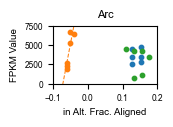


Association btwn Young, MA, Aged, & All Change in Alt. Frac ALigned:
R [Young, Aged, All]: 
0.01182672751840573 -0.019627727796524202 -0.9406816391729679 -0.16309873059545577
P [Young, MA, Aged, All]: 
0.9822607358333546 0.9705621890736935 0.005173641089822076 0.5178620980254787


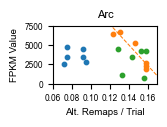

In [165]:
#Left
res = stats.linregress(behavior[:6],egr1[:6])
yslope2 = res.slope; yint2 = res.intercept; yr2 = res.rvalue; yp2 = res.pvalue

res = stats.linregress(behavior[6:12],egr1[6:12])
maslope2 = res.slope; maint2 = res.intercept; mar2 = res.rvalue ; map2 = res.pvalue

res = stats.linregress(behavior[12:],egr1[12:])
aslope2 = res.slope; aint2 = res.intercept; ar2 = res.rvalue ; ap2 = res.pvalue

res = stats.linregress(behavior,egr1)
allslope2 = res.slope; allint2 = res.intercept; allr2 = res.rvalue; allp2 = res.pvalue

print('\nAssociation btwn Young, MA, Aged, & All egr1 vs. Change in Alt Frac. Req')
print('R [Young, Aged, All]: ')
print(yr2, mar2, ar2, allr2)
print('P [Young, MA, Aged, All]: ')
print(yp2, map2, ap2, allp2)

#Plot Figure S8Eleft
fig, ax = plt.subplots(figsize = (1.35,0.75))
ax.set_title('Egr1', fontsize = 8)
ax.scatter(behavior[:6],egr1[:6], color = 'C0', label = 'Young', s = 10)
ax.scatter(behavior[6:12],egr1[6:12], color = 'C2', label = 'MA', s = 10)
ax.scatter(behavior[12:],egr1[12:], color = 'C1', label = 'Aged', s = 10)
ax.set_xlabel('in Alt. Frac. Requested', fontsize = 7)
ax.set_ylabel('FPKM Value', fontsize = 7)
ax.set_xlim([-0.05,0.55])
ax.set_ylim([0,6000])
ax.set_yticks([0,2000,4000,6000])
ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5])
ax.tick_params(labelsize = 6)
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
#ax.plot(X_plot, yslope2*X_plot + yint2, '--', linewidth = 0.75, color = 'C0', label = 'Young Fit')
ax.plot(X_plot, aslope2*X_plot + aint2, '--', linewidth = 0.75, color = 'C1', label = 'Aged')
#ax.plot(X_plot, allslope2*X_plot + allint2, '-', linewidth = 1, color = 'k', label = 'All Ages')
#ax.legend(loc = 4, fontsize = 9, prop = {'size': 10})
plt.savefig(save_folder + 'S8Gleft.png', dpi = 400, bbox_inches = 'tight')
plt.savefig(save_folder + 'S8Gleft.svg', dpi = 400, bbox_inches = 'tight')
plt.show()

#Middle
res = stats.linregress(fracaligned[:6],arc[:6])
yslope2 = res.slope; yint2 = res.intercept; yr2 = res.rvalue; yp2 = res.pvalue

res = stats.linregress(fracaligned[6:12],arc[6:12])
maslope2 = res.slope; maint2 = res.intercept; mar2 = res.rvalue ; map2 = res.pvalue

res = stats.linregress(fracaligned[12:],arc[12:])
aslope2 = res.slope; aint2 = res.intercept; ar2 = res.rvalue ; ap2 = res.pvalue

res = stats.linregress(fracaligned, arc)
allslope2 = res.slope; allint2 = res.intercept; allr2 = res.rvalue; allp2 = res.pvalue

print('\nAssociation btwn Young, MA, Aged, & All Change in Alt. Frac ALigned:')
print('R [Young, Aged, All]: ')
print(yr2, mar2, ar2, allr2)
print('P [Young, MA, Aged, All]: ')
print(yp2, map2, ap2, allp2)

#Plot Figure S8Emiddle
fig, ax = plt.subplots(figsize = (1.35,0.75))
ax.set_title('Arc', fontsize = 8)
ax.scatter(fracaligned[:6],arc[:6], color = 'C0', label = 'Young', s = 10)
ax.scatter(fracaligned[6:12],arc[6:12], color = 'C2', label = 'MA', s = 10)
ax.scatter(fracaligned[12:],arc[12:], color = 'C1', label = 'Aged', s = 10)
ax.set_xlabel('in Alt. Frac. Aligned', fontsize = 7)
ax.set_ylabel('FPKM Value', fontsize = 7)
ax.set_xlim([-0.1,0.2])
ax.set_ylim([0,7500])
ax.set_yticks([0,2500,5000,7500])
ax.set_xticks([-0.1,0,0.1,0.2])
ax.tick_params(labelsize = 6)
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
#ax.plot(X_plot, yslope2*X_plot + yint2, '--', linewidth = 0.75, color = 'C0', label = 'Young Fit')
ax.plot(X_plot, aslope2*X_plot + aint2, '--', linewidth = 0.75, color = 'C1', label = 'Aged')
#ax.plot(X_plot, allslope2*X_plot + allint2, '-', linewidth = 1, color = 'k', label = 'All Ages')
#ax.legend(loc = 4, fontsize = 9, prop = {'size': 10})
plt.savefig(save_folder + 'S8Gmiddle.png', dpi = 400, bbox_inches = 'tight')
plt.savefig(save_folder + 'S8Gmiddle.svg', dpi = 400, bbox_inches = 'tight')
plt.show()

#Right
res = stats.linregress(remapfreq[:6],arc[:6])
yslope2 = res.slope; yint2 = res.intercept; yr2 = res.rvalue; yp2 = res.pvalue

res = stats.linregress(remapfreq[6:12],arc[6:12])
maslope2 = res.slope; maint2 = res.intercept; mar2 = res.rvalue ; map2 = res.pvalue

res = stats.linregress(remapfreq[12:],arc[12:])
aslope2 = res.slope; aint2 = res.intercept; ar2 = res.rvalue ; ap2 = res.pvalue

res = stats.linregress(remapfreq, arc)
allslope2 = res.slope; allint2 = res.intercept; allr2 = res.rvalue; allp2 = res.pvalue

print('\nAssociation btwn Young, MA, Aged, & All Change in Alt. Frac ALigned:')
print('R [Young, Aged, All]: ')
print(yr2, mar2, ar2, allr2)
print('P [Young, MA, Aged, All]: ')
print(yp2, map2, ap2, allp2)

#Plot Figure S8Eright
fig, ax = plt.subplots(figsize = (1.35,0.75))
ax.set_title('Arc', fontsize = 8)
ax.scatter(remapfreq[:6],arc[:6], color = 'C0', label = 'Young', s = 10)
ax.scatter(remapfreq[6:12],arc[6:12], color = 'C2', label = 'MA', s = 10)
ax.scatter(remapfreq[12:],arc[12:], color = 'C1', label = 'Aged', s = 10)
ax.set_xlabel('Alt. Remaps / Trial', fontsize = 7)
ax.set_ylabel('FPKM Value', fontsize = 7)
ax.set_xlim([0.06,0.17])
ax.set_ylim([0,7500])
ax.set_yticks([0,2500,5000,7500])
ax.set_xticks([0.06,0.08,0.10,0.12,0.14,0.16])
ax.tick_params(labelsize = 6)
X_plot = np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],100)
#ax.plot(X_plot, yslope2*X_plot + yint2, '--', linewidth = 0.75, color = 'C0', label = 'Young Fit')
ax.plot(X_plot, aslope2*X_plot + aint2, '--', linewidth = 0.75, color = 'C1', label = 'Aged')
#ax.plot(X_plot, allslope2*X_plot + allint2, '-', linewidth = 1, color = 'k', label = 'All Ages')
#ax.legend(loc = 4, fontsize = 9, prop = {'size': 10})
plt.savefig(save_folder + 'S8Gright.png', dpi = 400, bbox_inches = 'tight')
plt.savefig(save_folder + 'S8Gright.svg', dpi = 400, bbox_inches = 'tight')
plt.show()

In [187]:
youngdistances = pd.read_csv('C:/Users/Python/Downloads/youngdistances.csv') # adjust path name
youngdistances.head()

yRFF = np.array(youngdistances['RF-F'])
ySMF = np.array(youngdistances['SM-F'])
yRFM = np.array(youngdistances['RF-M'])
ySMM = np.array(youngdistances['SM-M'])

print('Young RF-F, SM-F, RF-M, SMM:')
print(str(np.round(np.mean(yRFF), 4)) + ' ± ' + str(np.round(stats.sem(yRFF), 4)) + ' ; ' 
      + str(np.round(np.nanmean(ySMF), 4)) + ' ± ' + str(np.round(stats.sem(ySMF, nan_policy = 'omit'), 4)) + ' ; ' 
       + str(np.round(np.nanmean(yRFM), 4)) + ' ± ' + str(np.round(stats.sem(yRFM,nan_policy = 'omit'), 4)) + ' ; ' 
      + str(np.round(np.nanmean(ySMM), 4)) + ' ± ' + str(np.round(stats.sem(ySMM,nan_policy = 'omit'), 4)))

stat, p_diff = stats.kruskal(yRFF[~np.isnan(yRFF)],ySMF[~np.isnan(ySMF)],yRFM[~np.isnan(yRFM)],ySMM[~np.isnan(ySMM)])
print('KW stat = ' + str(stat))
print('p = ' + str(p_diff))

import scikit_posthocs as ph
yd = [yRFF[~np.isnan(yRFF)],ySMF[~np.isnan(ySMF)],yRFM[~np.isnan(yRFM)],ySMM[~np.isnan(ySMM)]]
ph.posthoc_conover(yd, p_adjust = 'holm')

Young RF-F, SM-F, RF-M, SMM:
47.3479 ± 3.0452 ; 50.79 ± 1.5021 ; 33.3543 ± 0.0 ; 42.7192 ± 1.6066
KW stat = 7.936088154269969
p = 0.0473512036350041


,1,2,3,4
1,1.000000,0.383757,0.067391,0.383757
2,0.383757,1.000000,0.023712,0.104925
3,0.067391,0.023712,1.000000,0.383757
4,0.383757,0.104925,0.383757,1.000000


In [188]:
ageddistances = pd.read_csv('C:/Users/Python/Downloads/ageddistances.csv') # adjust path name
ageddistances.head()

aRFF = np.array(ageddistances['RF-F'])
aSMF = np.array(ageddistances['SM-F'])
aRFM = np.array(ageddistances['RF-M'])
aSMM = np.array(ageddistances['SM-M'])

print('Aged RF-F, SM-F, RF-M, SMM:')
print(str(np.round(np.nanmean(aRFF), 4)) + ' ± ' + str(np.round(stats.sem(aRFF, nan_policy = 'omit'), 4)) + ' ; ' 
      + str(np.round(np.nanmean(aSMF), 4)) + ' ± ' + str(np.round(stats.sem(aSMF, nan_policy = 'omit'), 4)) + ' ; ' 
       + str(np.round(np.nanmean(aRFM), 4)) + ' ± ' + str(np.round(stats.sem(aRFM,nan_policy = 'omit'), 4)) + ' ; ' 
      + str(np.round(np.nanmean(aSMM), 4)) + ' ± ' + str(np.round(stats.sem(aSMM,nan_policy = 'omit'), 4)))

stat, p_diff = stats.kruskal(aRFF[~np.isnan(aRFF)],aSMF[~np.isnan(aSMF)],aRFM[~np.isnan(aRFM)],aSMM[~np.isnan(aSMM)])
print('KW stat = ' + str(stat))
print('p = ' + str(p_diff))

import scikit_posthocs as ph
ad = [aRFF[~np.isnan(aRFF)],aSMF[~np.isnan(aSMF)],aRFM[~np.isnan(aRFM)],aSMM[~np.isnan(aSMM)]]
ph.posthoc_conover(ad, p_adjust = 'holm')

Aged RF-F, SM-F, RF-M, SMM:
33.1049 ± 0.0 ; 52.293 ± 2.3796 ; 56.6473 ± 3.8768 ; 44.3687 ± 1.4101
KW stat = 9.099724517906335
p = 0.02799396150271243


,1,2,3,4
1,1.000000,0.018465,0.010547,0.492333
2,0.018465,1.000000,0.872288,0.047981
3,0.010547,0.872288,1.000000,0.028049
4,0.492333,0.047981,0.028049,1.000000


In [189]:
stat, p_diff = stats.kruskal(yRFF[~np.isnan(yRFF)],ySMF[~np.isnan(ySMF)],yRFM[~np.isnan(yRFM)],ySMM[~np.isnan(ySMM)],aRFF[~np.isnan(aRFF)],aSMF[~np.isnan(aSMF)],aRFM[~np.isnan(aRFM)],aSMM[~np.isnan(aSMM)])
print('KW stat = ' + str(stat))
print('p = ' + str(p_diff))

alld = [yRFF[~np.isnan(yRFF)],ySMF[~np.isnan(ySMF)],yRFM[~np.isnan(yRFM)],ySMM[~np.isnan(ySMM)],aRFF[~np.isnan(aRFF)],aSMF[~np.isnan(aSMF)],aRFM[~np.isnan(aRFM)],aSMM[~np.isnan(aSMM)]]
ph.posthoc_conover(alld, p_adjust = 'holm')

KW stat = 18.63667464933288
p = 0.00940499153235802


,1,2,3,4,5,6,7,8
1,1.000000,1.000000,0.287853,1.000000,0.110260,0.809163,0.256614,1.000000
2,1.000000,1.000000,0.068117,0.256614,0.024374,1.000000,1.000000,0.906698
3,0.287853,0.068117,1.000000,1.000000,1.000000,0.021266,0.005334,1.000000
4,1.000000,0.256614,1.000000,1.000000,1.000000,0.079520,0.017714,1.000000
5,0.110260,0.024374,1.000000,1.000000,1.000000,0.007904,0.001766,0.565449
6,0.809163,1.000000,0.021266,0.079520,0.007904,1.000000,1.000000,0.324694
7,0.256614,1.000000,0.005334,0.017714,0.001766,1.000000,1.000000,0.105381
8,1.000000,0.906698,1.000000,1.000000,0.565449,0.324694,0.105381,1.000000
